# Advanced usage

This tutorial was written using a [Jupyter Notebook](https://jupyter.org/).

Start by importing some stuff used by the Jupyter Notebook.

In [10]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, '/home/tommy/Desktop/streprogen')
from streprogen import Day, DynamicExercise, StaticExercise, Program

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Examine reps/intensity mappings

In [11]:
import matplotlib.pyplot as plt
from streprogen import reps_to_intensity, reps_to_intensity_relaxed, reps_to_intensity_tight

reps = list(range(1, 12 + 1))
intensities_norm = list(map(reps_to_intensity, reps))
intensities_relaxed = list(map(reps_to_intensity_relaxed, reps))
intensities_tight = list(map(reps_to_intensity_tight, reps))

### Plotting it

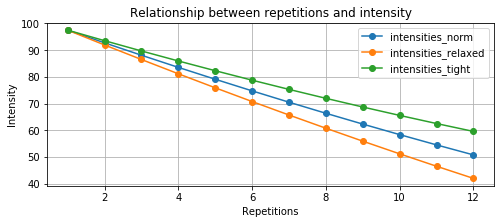

In [12]:
plt.figure(figsize = (8, 3))
plt.title('Relationship between repetitions and intensity')
plt.plot(reps, intensities_norm, '-o', label = 'intensities_norm')
plt.plot(reps, intensities_relaxed, '-o', label = 'intensities_relaxed')
plt.plot(reps, intensities_tight, '-o', label = 'intensities_tight')
plt.ylabel('Intensity')
plt.xlabel('Repetitions')
plt.legend(loc = 'best')
plt.grid(True)
plt.show()

In [4]:
table_width = 6
print('reps'.ljust(8),*[str(i).ljust(table_width) for i in reps])
print('-'*90)
print('norm'.ljust(8), *[str(round(i, 1)).ljust(table_width) for i in intensities_norm])
print('relaxed'.ljust(8),*[str(round(i, 1)).ljust(table_width) for i in intensities_relaxed])
print('tight'.ljust(8),*[str(round(i, 1)).ljust(table_width) for i in intensities_tight])

reps     1      2      3      4      5      6      7      8      9      10     11     12    
------------------------------------------------------------------------------------------
norm     97.5   92.8   88.1   83.5   79.1   74.8   70.5   66.3   62.3   58.4   54.5   50.8  
relaxed  97.5   92.0   86.5   81.2   75.9   70.8   65.7   60.8   55.9   51.1   46.5   42.0  
tight    97.5   93.5   89.7   86.0   82.3   78.8   75.3   72.0   68.7   65.5   62.5   59.5  


In [5]:
from functools import partial

# Use a partial function to create a custom set/
custom_set_intensity = partial(reps_to_intensity, slope=-4.8, constant=120.5)

# Create program
program = Program(reps_to_intensity_func=custom_set_intensity, duration = 2)

squats = DynamicExercise('Squats', 100, 110, min_reps = 1, max_reps = 8)
day = Day(exercises = [squats])

program.add_days(day)
program.render()
print(program)

----------------------------------------------------------------
Program: Untitled

Program parameters
  duration: 2
  reps_per_exercise: 25
  avg_intensity: 75
  reps_scalers: 0.8, 1
  intensity_scalers: 1, 0.9
  units: kg
----------------------------------------------------------------
Exercise information
  Day 1
   Squats   100kg -> 110kg   reps: [1, 8]   weekly inc.: 4.9%
----------------------------------------------------------------
Program
 Week 1
  Day 1
   Squats   7 x 92.5kg   7 x 92.5kg   7 x 92.5kg   

 Week 2
  Day 1
   Squats   7 x 102.5kg  7 x 102.5kg  6 x 107.5kg  6 x 107.5kg  

----------------------------------------------------------------


/home/tommy/Desktop/streprogen/streprogen/program.py:217: UserWarning: 
'reps_to_intensity_func' maps to > 100.
  warnings.warn("\n'reps_to_intensity_func' maps to > 100.")
/home/tommy/Desktop/streprogen/streprogen/program.py:231: UserWarning: 
"Squats" grows with 4.9% each week.
  warnings.warn(msg)
/home/tommy/Desktop/streprogen/streprogen/program.py:375: UserWarning: 
but the desired average intensity for this week is 75. Reaching this intensity
is not attainable since it corresponds to repetitions higher than 8.
SOLUTION: Either (1) allow higher repetitions, (2) change the desired intensity
or (3) ignore this message. The software will do it's best to remedy this.

  warnings.warn(msg)
/home/tommy/Desktop/streprogen/streprogen/program.py:375: UserWarning: 
but the desired average intensity for this week is 71.25. Reaching this intensity
is not attainable since it corresponds to repetitions higher than 8.
SOLUTION: Either (1) allow higher repetitions, (2) change the desired intensit

In [6]:
import sys
sys.path.insert(0, '/home/tommy/Desktop/streprogen')
from streprogen import Day, DynamicExercise, StaticExercise, Program

## Scale reps and intensities

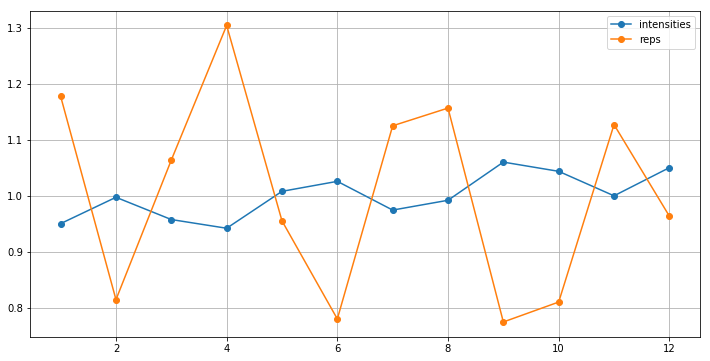

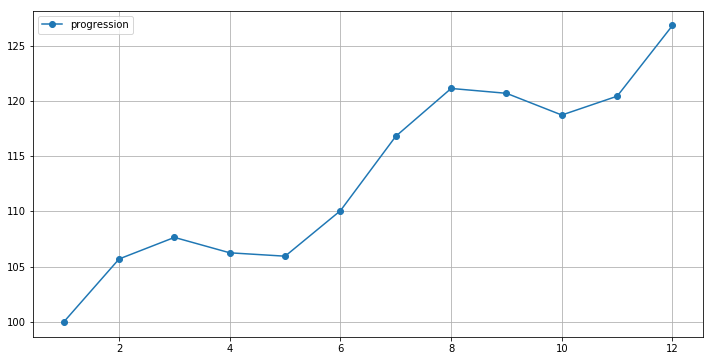

In [7]:
import matplotlib.pyplot as plt
import functools
from streprogen import progression_sinusoidal

duration = 12

intensity = functools.partial(progression_sinusoidal, start_weight = 0.95,
                             end_weight = 1.05, start_week = 1, end_week = duration,
                             periods=3, scale=0.04, offset=0)

reps = functools.partial(progression_sinusoidal, start_weight = 1.1,
                             end_weight = 0.9, start_week = 1, end_week = duration,
                             periods=3, scale=0.25, offset=2)

weeks = list(range(1, duration + 1))
intensities = list(map(intensity, weeks))
reps = list(map(reps, weeks))

plt.figure(figsize = (12, 6))
plt.plot(weeks, intensities, 'o-', label = 'intensities')
plt.plot(weeks, reps, 'o-', label = 'reps')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()


progression = functools.partial(progression_sinusoidal, start_weight = 100,
                             end_weight = 100 * 1.02**duration, start_week = 1, end_week = duration,
                             periods=2, scale=0.035, offset=0)

progress = functools.partial(progression_sinusoidal,
                             periods=2, scale=0.035, offset=0)

plt.figure(figsize = (12, 6))
plt.plot(weeks, list(map(progression, weeks)), 'o-', label = 'progression')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

## Create the program

In [8]:
program = Program(name='TommyAugust17', 
               duration=duration, 
               reps_per_exercise=25, 
               reps_scalers=reps, 
               avg_intensity=75, 
               intensity_scalers=intensities, 
               progression_func=progress, 
               reps_to_intensity_func=None, 
               units='', 
               round_to=5, 
               min_reps_consistency=None, 
               minimum_percentile=0.0, 
               go_to_min=False, 
               times_to_render=25, 
               verbose=False)

# Start (s) and end (s) weights for squats
squats_s = 70
squats_e = 120

bench_s = 125
bench_e = 155

chins_s = 140
chins_e = 160

military_s = 70
military_e = 85



# Day 1
ex1 = DynamicExercise('Knebøy', squats_s, squats_e, 1, 8)

ex2 = DynamicExercise('Benk (kloss)', int(bench_s*1.1), int(bench_e*1.1), 
                      1, 6, reps = 20, avg_intensity = 85)
ex3 = DynamicExercise('Roing', 100, 125, 4, 8)
ex4 = StaticExercise('Triceps', '4 x 10')
d1 = Day('Mandag', exercises = [ex1, ex2, ex3, ex4])

# Day 2
ex1 = DynamicExercise('Bench', bench_s, bench_e, 1, 8)
ex2 = DynamicExercise('Chin ups (l)', int(chins_s*0.9), 
                      int(chins_e*0.9), 4, 8)
ex3 = DynamicExercise('Militærpress (l)', military_s, military_e, 4, 8)
ex4 = StaticExercise('Biceps', '4 x 10')
d2 = Day('Tirsdag', exercises = [ex1, ex2, ex3, ex4])

# Day 3
ex1 = DynamicExercise('Knebøy (lett)', squats_s, squats_e, 4, 8)
ex2 = DynamicExercise('Chin ups (t)', chins_s, chins_e, 1, 8)
ex3 = DynamicExercise('Markløft (l)', 60, 80, 2, 6,
                     reps = 20, avg_intensity = 85)
ex4 = StaticExercise('Triceps', '4 x 10')
d3 = Day('Torsdag', exercises = [ex1, ex2, ex3, ex4])


# Day 4
ex1 = DynamicExercise('Knebøy (tung)', squats_s, squats_e, 1, 8)
ex2 = DynamicExercise('Smalbenk', int(bench_s*0.95), int(bench_e*0.95), 4, 8)  
ex3 = DynamicExercise('Militærpress (t)', military_s, military_e, 4, 8)
ex4 = StaticExercise('Triceps', '4 x 10')
d4 = Day('Fredag', exercises = [ex1, ex2, ex3, ex4])


program.add_days(d1, d2, d3, d4)
program.render()

print(program.to_text(verbose = True)[:])

with open('program.html', 'w', encoding = 'utf-8') as file:
    file.write(program.to_html(table_width = 7))

/home/tommy/Desktop/streprogen/streprogen/program.py:231: UserWarning: 
"Knebøy" grows with 4.6% each week.
  warnings.warn(msg)
/home/tommy/Desktop/streprogen/streprogen/program.py:231: UserWarning: 
"Knebøy (lett)" grows with 4.6% each week.
  warnings.warn(msg)
/home/tommy/Desktop/streprogen/streprogen/program.py:231: UserWarning: 
"Knebøy (tung)" grows with 4.6% each week.
  warnings.warn(msg)


----------------------------------------------------------------
Program: TommyAugust17

Program parameters
  duration: 12
  reps_per_exercise: 25
  avg_intensity: 75
  reps_scalers: 1.2, 0.8, 1.1, 1.3, 1, 0.8, 1.1, 1.2, 0.8, 0.8, 1.1, 1
  intensity_scalers: 0.9, 1, 1, 0.9, 1, 1, 1, 1, 1.1, 1, 1, 1
  units: 
----------------------------------------------------------------
Exercise information
  Mandag
   Knebøy             70 -> 120    reps: [1, 8]   weekly inc.: 4.6%
   Benk (kloss)       137 -> 170   reps: [1, 6]   weekly inc.: 1.8%
   Roing              100 -> 125   reps: [4, 8]   weekly inc.: 1.9%
   Triceps            4 x 10
  Tirsdag
   Bench              125 -> 155   reps: [1, 8]   weekly inc.: 1.8%
   Chin ups (l)       126 -> 144   reps: [4, 8]   weekly inc.: 1.1%
   Militærpress (l)   70 -> 85     reps: [4, 8]   weekly inc.: 1.6%
   Biceps             4 x 10
  Torsdag
   Knebøy (lett)      70 -> 120    reps: [4, 8]   weekly inc.: 4.6%
   Chin ups (t)       140 -> 160   reps: 